# Biblioteka Qiskit wprowadzenie


```bash
python3 -m venv venv
source venv/bin/activate
# Scripts\Activate

pip install qiskit==0.44.1
pip install qiskit[visualization]
# pip install 'qiskit[visualization]'
pip install qiskit_aer==0.12.2
pip install qiskit_machine_learning==0.6.1
pip install qiskit-finance==0.3.4
pip install qiskit-ibmq-provider==0.20.2
pip install qiskit-ignis==0.7.1
pip install qiskit-algorithms==0.2.1
```
The other important libs.

```bash
pip install pylatexenc ipywidgets qutip
pip install scikit-learn numpy scipy matplotlib 
pip install ipython pandas sympy nose seaborn jupyter notebook jupyterlab
```

In [1]:
from qiskit import  __qiskit_version__
print(__qiskit_version__)

import qiskit.tools.jupyter

%qiskit_version_table

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': '0.3.4', 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}


In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

## Qiskit podstawy

Tworzenie rejestrów:

1. kwantowego `QuantumRegister` - do inicjalizowania kubitów. Kubity domyślnie inicjalizowane są w stanie $|0\rangle$
2. klasycznego `ClassicalRegister` do przechowywania wyników pomiarów kubitów. Po pomiarze otrzymywany wynik zawsze jest binarny $\{0,1\}$.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

Oba rejestry wykorzystywane będą do generowania obwodów kwantowych `QuantumCircuit`.

Wszystkie podstawowe obiekty dostępne są bezpośrednio w bibliotece `qiskit`.

In [3]:
qreq = QuantumRegister(4) # rejest kwantowy z 4 qubitami

In [4]:
creg = ClassicalRegister(4) # rejestr klasyczny z 4 bitami

In [5]:
circuit = QuantumCircuit(qreq, creg) # obwód kwantowy z 4 qubitami i 4 bitami

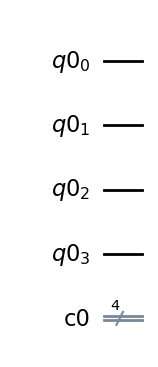

In [6]:
circuit.draw('mpl') # funkcja rysująca obwód

In [7]:
output = QuantumRegister(1) # inny rejestr kwantowy z 1 qubitem

In [8]:
circuit2 = QuantumCircuit(qreq, output, creg)

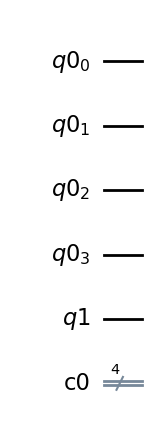

In [9]:
circuit2.draw("mpl")

In [10]:
circuit3 = QuantumCircuit(qreq)

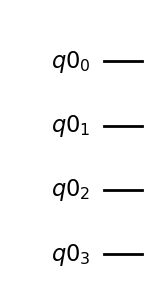

In [11]:
circuit3.draw('mpl')

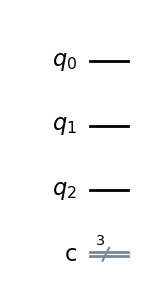

In [12]:
circuit4 = QuantumCircuit(3,3)
circuit4.draw("mpl")

Po zdefiniowaniu naszego algorytmu jako zbioru bramek działających na naszych kubitach, obwód nalezy wykonać za pomocą metody `execute`.

In [13]:
from qiskit import execute

## Podstawowe backendy

Wykonanie obwodu moze być realizowane zarówno na prawidziwym komputerze kwantowym jak i na lokalnym, klasycznym symulatorze. 
Większość naszych zadań przeprowadzanych będzie z wykorzystaniem symulatora `Aer`. 

In [14]:
from qiskit import Aer 

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Podstawowym symulatorem na którym mozemy w pełni uruchomić kod obwodu jest `qasm_simulator`.
Uruchamia on cały obwód i zapisuje wyniki do rejestru klasycznego. Po wielokrotnym uruchomieniu obwodu mozemy sprawdzić równiez statystyki otrzymanych wyników. 

### Pomiar w obwodzie i wielokrotne uruchamianie układu

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
# utworzenie obwodu kwantowego z 2 qubitami i 2 bitami
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0]) # działamy jakąś bramką na pierwszym qubicie
circuit.measure(qreg, creg) # dokunujemy pomiaru

# zdefiniowanie symulatora
simulator = Aer.get_backend('qasm_simulator')
# definicja zadania do wykonania
job = execute(circuit, simulator, shots=1000)

print(job.job_id())
# wyciągnięcie wyników i statystyk
counts = job.result().get_counts(circuit)
print(counts)

9c3cd19b-6099-4117-b631-a18d3e2e0297
{'00': 511, '01': 489}


Wizualizacja otrzymanych wyników realizowana metodą `plot_histogram`. 

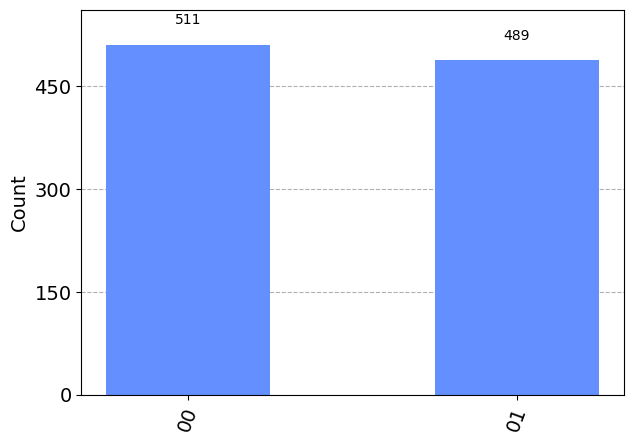

In [16]:
from qiskit.visualization import plot_histogram
display(plot_histogram(counts))

## Tworzenie stanu jednokubitowego 


$$
\ket{\psi}=\ket{0}
$$

Do inspekcji stanu układu (bez jego pomiaru) mozemy uzyć backend `statevector_simulator`.

In [17]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

# klasyczny symulator pozwala zobaczyc stan
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector() # wynik w postaci wektora stanu
print(state)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [18]:
state.draw('latex') # metoda wypisująca wektor stanu w latexu

<IPython.core.display.Latex object>

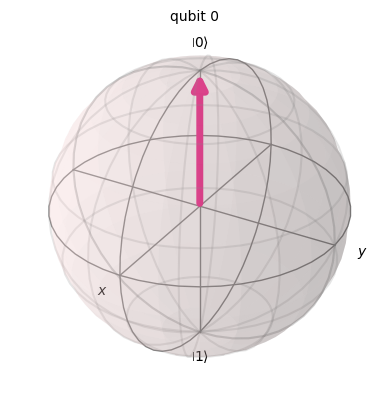

In [19]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

In [20]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.h(qr[0])
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

<IPython.core.display.Latex object>

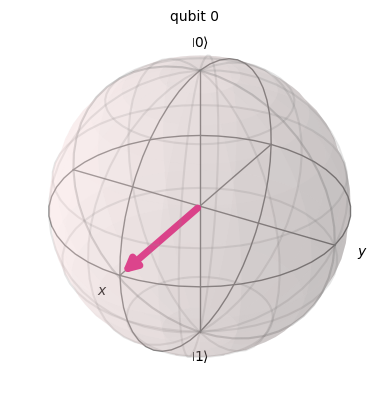

In [21]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

### inicjalizacja stanu


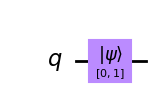

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [6]:
from qiskit import Aer, execute
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector()
state.draw('latex')

<IPython.core.display.Latex object>

In [7]:
initial_state = [1,1]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = execute(qc, backend).result().get_statevector()
result.draw('latex')

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [8]:
from math import sqrt
initial_state = [1/sqrt(2),1/sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = execute(qc, backend).result().get_statevector()
result.draw('latex')

<IPython.core.display.Latex object>

In [9]:
from math import sqrt
initial_state = [1/2,sqrt(3)/2]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = execute(qc, backend).result().get_statevector()
result.draw('latex')

<IPython.core.display.Latex object>

In [10]:
from math import pi, cos, sin 
def get_state(theta):
    return [cos(theta/2), sin(theta/2)]

theta = -pi/2

qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector()
result.draw('latex')

<IPython.core.display.Latex object>

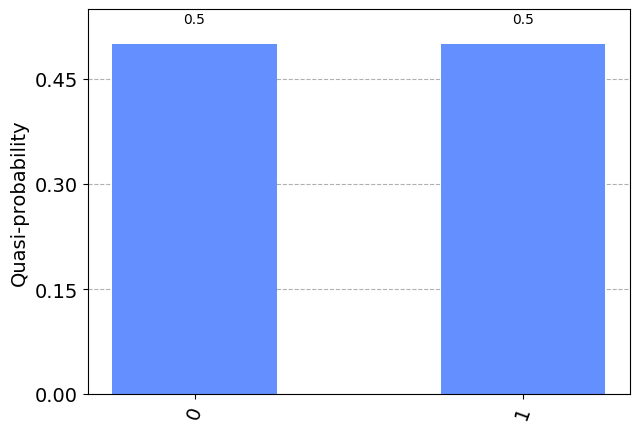

In [11]:
from qiskit.visualization import plot_histogram
result = execute(qc, backend).result().get_counts()
plot_histogram(result)

## Tworzenie stanu dwukubitowego
 

$$
\ket{00}, \ket{01}, \ket{10}, \ket{11}
$$


In [22]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

<IPython.core.display.Latex object>

In [23]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.h(qr[1])
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

<IPython.core.display.Latex object>

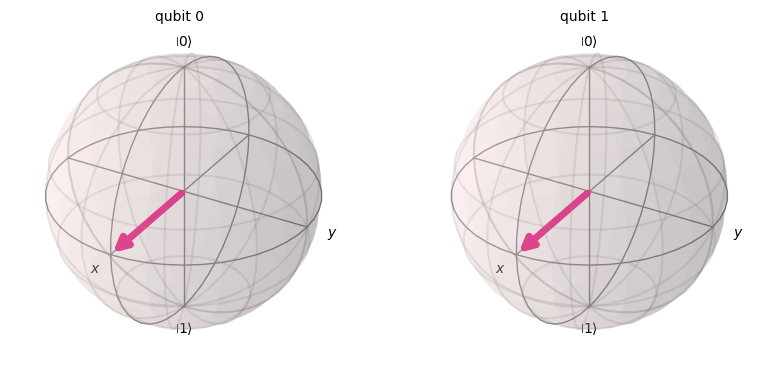

In [24]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

In [25]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()

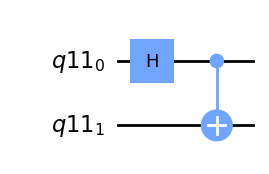

In [26]:
qc.draw('mpl')

In [27]:
state.draw('latex')

<IPython.core.display.Latex object>

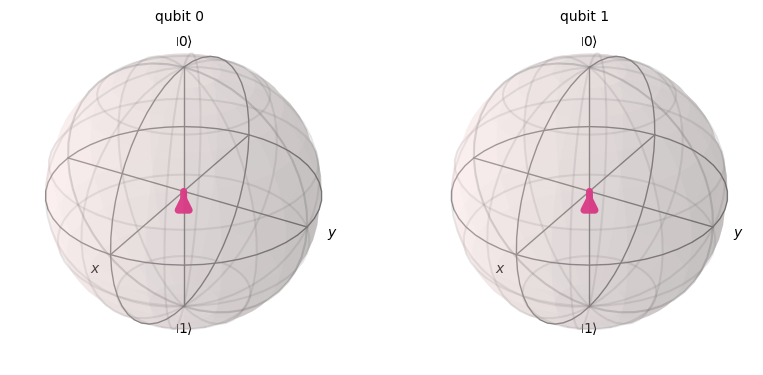

In [28]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

## Tworzenie stanu trzy-kubitowego 

$$
\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}$$

In [29]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
# qc.x(qr[0]) 
# qc.x(qr[1])

# klasyczny symulator pozwala zobaczyc stan
backend = Aer.get_backend('statevector_simulator')
job=execute(qc, backend)
result = job.result()
state = result.get_statevector()

Uruchom powyższy kod usuwajac poszczegolne komentarze i sprawdz wynik.


In [ ]:
# uruchom w środowisku IBM Quantum Experience
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account(token=MY_API_TOKEN)
provider = IBMProvider()

# Create a circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Select a backend.
backend = provider.get_backend("ibmq_qasm_simulator")

# Transpile the circuit
transpiled = transpile(qc, backend=backend)

# Submit a job.
job = backend.run(transpiled)
# Get results.
print(job.result().get_counts())

Więcej informacji znajdziesz [tutaj](https://github.com/Qiskit/qiskit-ibm-provider/blob/stable/0.7/docs/tutorials/Migration_Guide_from_qiskit-ibmq-provider.ipynb#)

In [30]:
from qiskit.tools.visualization import circuit_drawer

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q, c)
circuit_drawer(circuit)

┌─┐
 q15: ┤M├
      └╥┘
c2: 1/═╩═
       0